In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

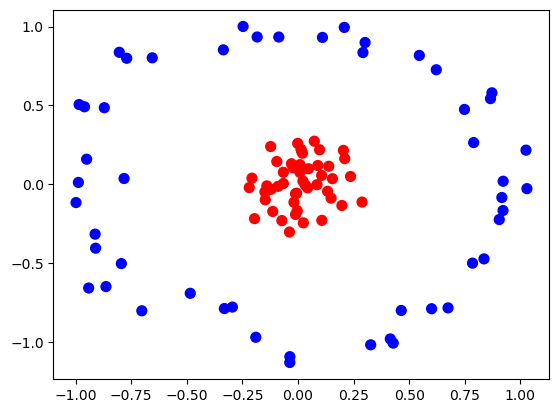

In [4]:
from sklearn.datasets._samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [6]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4

In [8]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\godsc\AppData\Local\Temp\ipykernel_5940\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


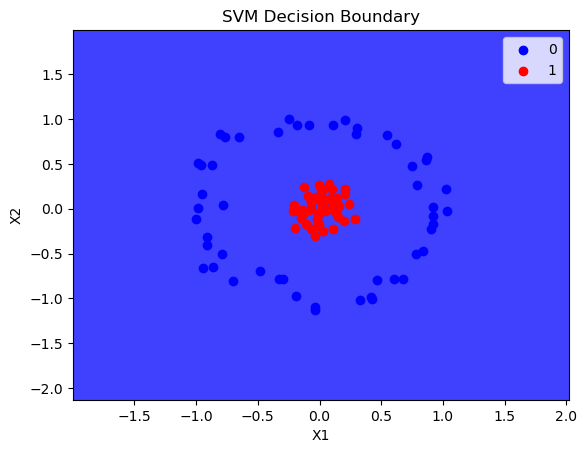

In [10]:
plot_decision_boundary(X, y, classifier)

In [11]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

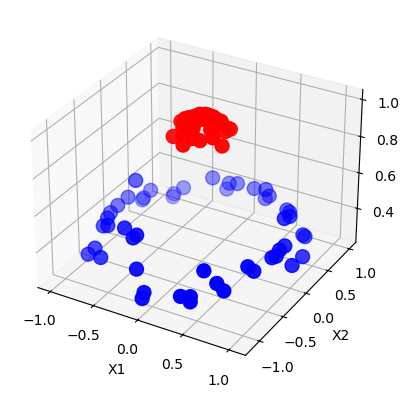

In [12]:
plot_3d_plot(X,y)

### Applying RBF Kernel Function

In [13]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\godsc\AppData\Local\Temp\ipykernel_5940\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


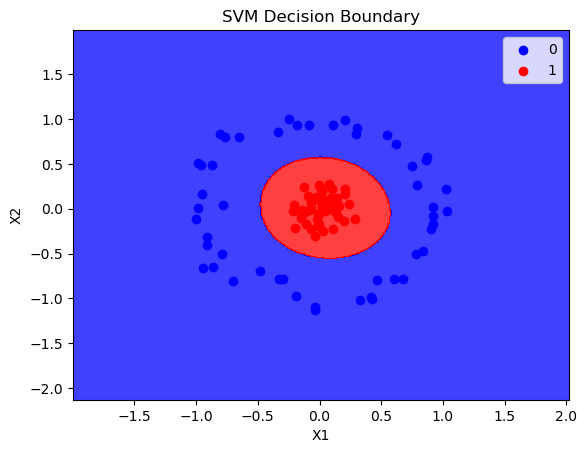

In [15]:
plot_decision_boundary(X, y, rbf_classifier)

### Applying Polynomial Kernel Function

In [23]:
# Degree is an exclusive hyperparameter which is only used when kernel='poly'
# You need to find the optimal value of degree
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\godsc\AppData\Local\Temp\ipykernel_5940\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


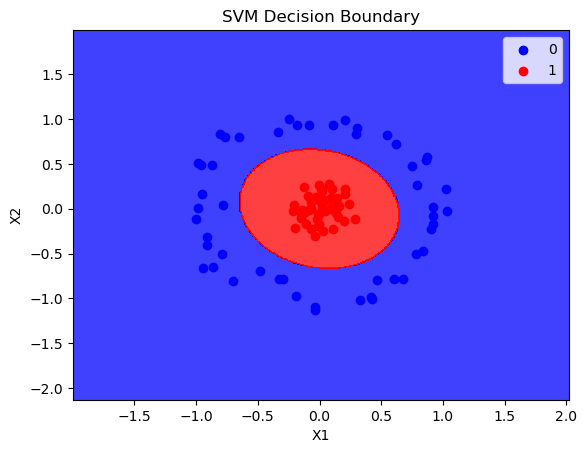

In [19]:
plot_decision_boundary(X, y, poly_classifier)

In [20]:
X

array([[-1.95332892e-01, -2.17201570e-01],
       [-9.97889449e-01, -1.15201237e-01],
       [-3.82445202e-02, -3.01765512e-01],
       [ 1.33213260e-01, -4.37342837e-02],
       [ 9.05128406e-01, -2.22871812e-01],
       [ 2.41436962e-02, -2.43751058e-01],
       [-3.67092767e-02, -1.12868039e+00],
       [ 1.34031604e-02,  2.22814489e-01],
       [ 1.69173272e-02,  2.08215897e-01],
       [-3.64162379e-02, -1.09204615e+00],
       [-9.40973481e-01, -6.56764872e-01],
       [-3.30788430e-01, -7.86912942e-01],
       [ 1.02950546e+00, -2.71100078e-02],
       [ 9.22040020e-01, -1.65651897e-01],
       [ 3.01849942e-01,  8.99044859e-01],
       [ 7.84813155e-01, -4.99036511e-01],
       [ 7.34375290e-02,  2.73734383e-01],
       [-9.59785403e-01,  4.91727726e-01],
       [ 2.02584534e-02,  1.97750362e-01],
       [-6.55217616e-02,  7.66221946e-02],
       [ 8.54001639e-02, -2.20535659e-03],
       [ 9.16810409e-01, -8.32188413e-02],
       [ 1.48959906e-01, -8.71775946e-02],
       [ 1.

In [21]:
X_new=np.exp(-(X**2))

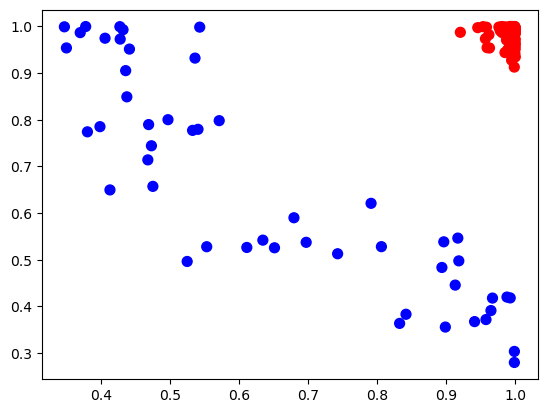

In [22]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')